# Question 1

a) Write a program to show the minimum and the maximum pixel values of an 8 bits/pixel grayscale image. Convert grayscale image to a binary image using threshold (Tth) operation where `Tth = (minimum pixel value + maximum pixel value) / 2`. Mathematically, `G(x, y) = 0 if f(x, y) ≤ (minimum gray value + maximum gray value) / 2; 1, otherwise`.

b) Do the same thresholding operation considering `Tth = 128`. `G(x, y) = 0 if f(x, y) ≤ 128; 1 otherwise`.

Highlight the differences in the two images obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'b256',
    'ba256',
    'f256',
    'l256',
    'n256',
    'o256',
    'p256',
    'pap256',
    'z256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of (filename, image) tuples for the images
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append((filename, image))

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



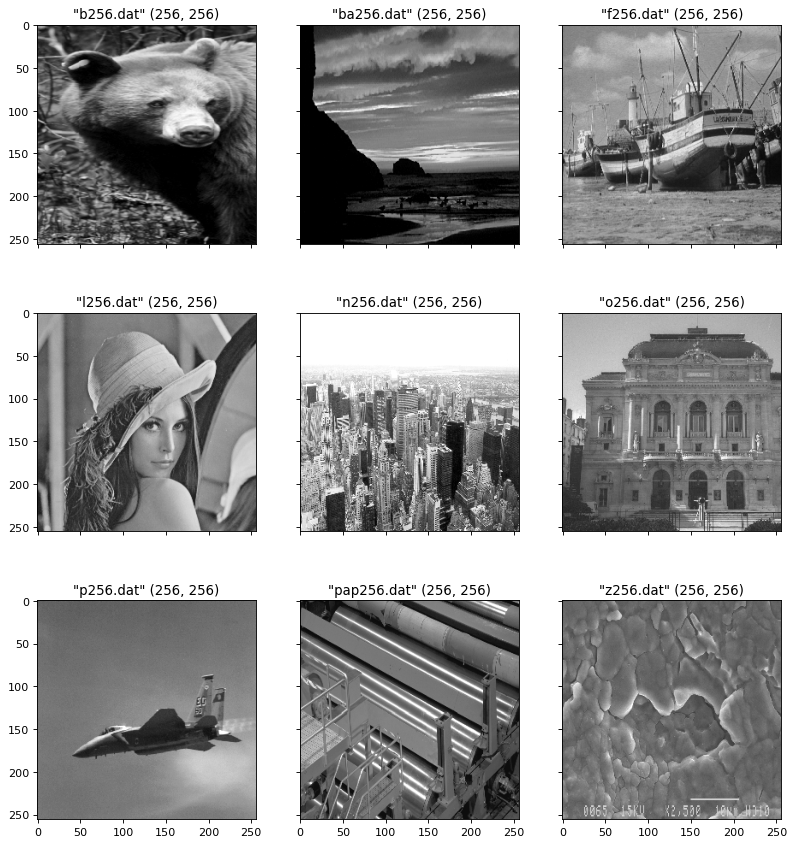

In [4]:
# Matrix dimensions
cols = 3
rows = -(-len(filenames) // cols)

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, (filename, image) in enumerate(images):
    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

In [5]:
# Store the threshold images
thres_imgs = []

## Section (a)

Display the maximum and minimum pixel values of each image.

Convert grayscale image to a binary image using threshold (Tth) operation where

`Tth = (minimum pixel value + maximum pixel value) / 2`.

Mathematically, `G(x, y) = 0 if f(x, y) ≤ (minimum gray value + maximum gray value) / 2; 1, otherwise`.

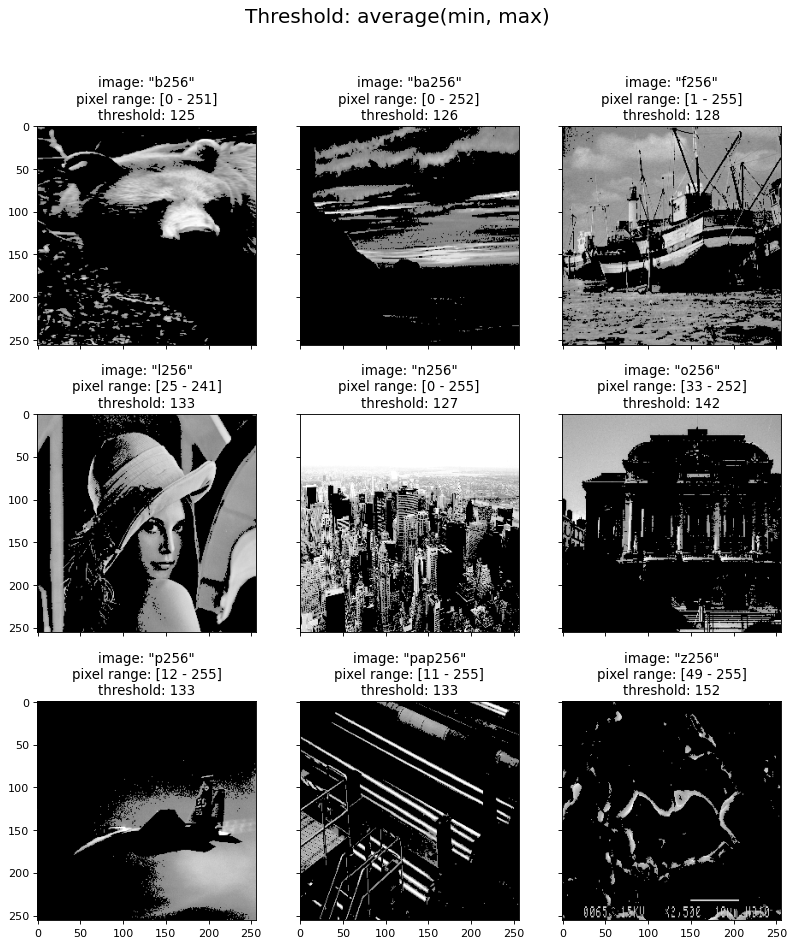

In [6]:
# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)
fig.suptitle("Threshold: average(min, max)", fontsize=18)

# Iterate for all images
for idx, (filename, image) in enumerate(images):
    # print('Image: "{}"\n'.format(filename))

    min_pixel = min([min(i) for i in image])    # minimum pixel value
    max_pixel = max([max(i) for i in image])    # maximum pixel value
    
    # print('Mininum pixel value: {}'.format(min_pixel))
    # print('Maximum pixel value: {}'.format(max_pixel))

    threshold = (int(min_pixel) + int(max_pixel)) // 2  # threshold
    # print('Threshold: {}'.format(threshold))

    '''
    Threshold image.

    Create a binary matrix of same shape as image.
    Each value is whether corresponding pixel value is higher than threshold.
    Itemwise multiply binary matrix with image.
    '''
    thres_img = (image > threshold) * image
    thres_img = np.array(thres_img)

    # Add dictionary of filename, min pixel, max pixel, threshold image into list
    thres_imgs.append({
        'filename': filename,
        'min': min_pixel,
        'max': max_pixel,
        'thres_avg': thres_img
    })

    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title(
        'image: "{}"\npixel range: [{} - {}]\nthreshold: {}'.format(
            filename,
            min_pixel,
            max_pixel,
            threshold
        )
    )
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        thres_img,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    '''
    Save threshold image as .bmp file
    '''
    plt.imsave(
        path_out_conv + ext_out[1:] + '/' + filename + '_thres_avg' + ext_out,
        thres_img,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    '''
    Save pixel values of threshold image as a 2D matrix in a .dat file
    '''
    lines=[]
    for i in range(len(thres_img)):
        lines.append(' '.join(str(thres_img[i])))
    with open(
        path_out_conv + ext_inp[1:] + '/' + filename + '_thres_avg' + ext_inp,
        'w'
    ) as outfile:
        outfile.write('\n'.join(lines))

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Section (b)

Do the same thresholding operation considering `Tth = 128`.

`G(x, y) = 0 if f(x, y) ≤ 128; 1 otherwise`

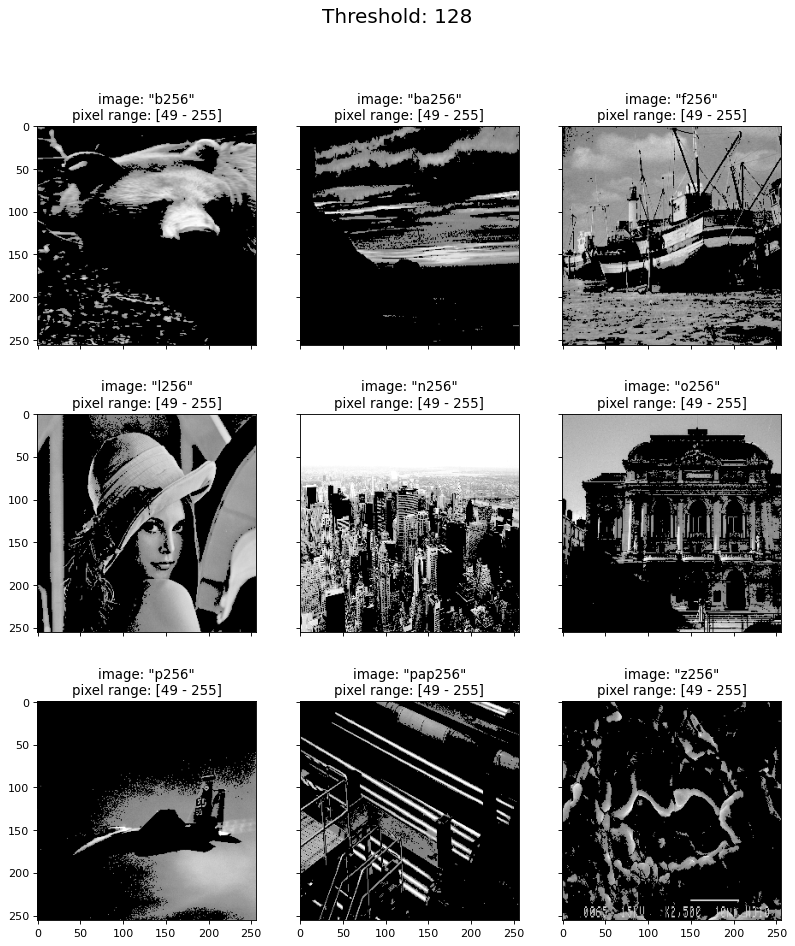

In [7]:
# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)
fig.suptitle("Threshold: 128", fontsize=18)

# Iterate for all images
for idx, (filename, image) in enumerate(images):
    threshold = 128

    '''
    Threshold image.

    Create a binary matrix of same shape as image.
    Each value is whether corresponding pixel value is higher than threshold.
    Itemwise multiply binary matrix with image.
    '''
    thres_img = (image > threshold) * image
    thres_img = np.array(thres_img)

    # Add threshold image to corresponding dictionary in list of threshold images
    thres_imgs[idx]['thres_128'] = thres_img

    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title(
        'image: "{}"\npixel range: [{} - {}]'.format(
            filename,
            min_pixel,
            max_pixel
        )
    )
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        thres_img,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    '''
    Save threshold image as .bmp file
    '''
    plt.imsave(
        path_out_conv + ext_out[1:] + '/' + filename + '_thres_128' + ext_out,
        thres_img,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    '''
    Save pixel values of threshold image as a 2D matrix in a .dat file
    '''
    lines=[]
    for i in range(len(thres_img)):
        lines.append(' '.join(str(thres_img[i])))
    with open(
        path_out_conv + ext_inp[1:] + '/' + filename + '_thres_128' + ext_inp,
        'w'
    ) as outfile:
        outfile.write('\n'.join(lines))

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()